# Step 1

In [29]:
# Imports
import pandas as pd
from  scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
train = loadmat('train_32x32.mat')
test = loadmat('test_32x32.mat')

train['y'][train['y']==10] = 0
test['y'][test['y']==10] = 0

In [3]:
# Visualise the data
imgs = train['X']
labels = train['y']
print("shape of images vector: {}".format(imgs.shape))
print("shape of labels vector: {}".format(labels.shape))

shape of images vector: (32, 32, 3, 73257)
shape of labels vector: (73257, 1)


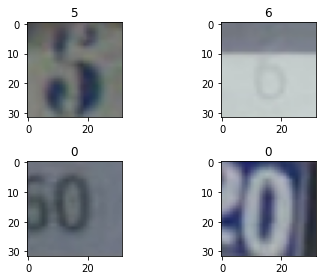

In [44]:
img_samples_ids = np.random.choice(imgs.shape[3], 4)
fig, axes = plt.subplots(nrows=2, ncols=2)
for img_id, ax in zip(img_samples_ids, axes.flat):
    img = train['X'][:,:,:,img_id]
    label = train['y'][img_id].squeeze()
    ax.imshow(img)
    ax.set_title(label)

plt.tight_layout()
plt.show()

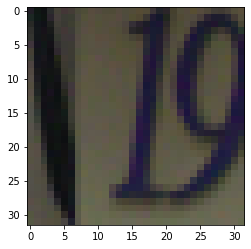

In [23]:
plt.imshow(sample[:,:,:,0])

In [4]:
# Take the first image with label, idx=0
idx = 0
img = imgs[:,:,:,idx]
label_img= labels[idx].squeeze()

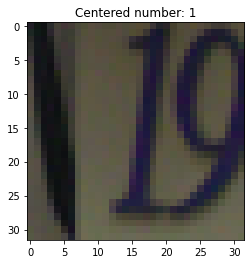

In [5]:
# Plot an image example with the label as title
plt.imshow(img)
plt.title("Centered number: {}".format(label_img))
plt.show()

# Step 2

In [46]:
img_dir = './train2017/'
img_name = '000000000036.jpg'

In [47]:
img = plt.imread(img_dir+img_name)

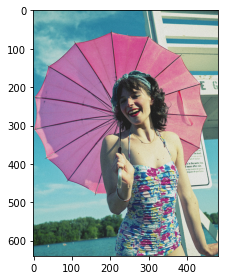

In [48]:
plt.imshow(img)
plt.tight_layout()
plt.show()

In [49]:
import json
import matplotlib.patches as patches

In [50]:
annotations_dir = './annotations/person_keypoints_train2017.json'

In [51]:
with open(annotations_dir, 'r') as f:
    data = json.load(f)

In [56]:
test = data['images']

In [64]:
r = np.random.choice(test, 1)[0]['file_name']

In [65]:
r

'000000282708.jpg'

In [53]:
data.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [54]:
# Make a keypoint list
keypoints = data['categories'][0]['keypoints']

In [79]:
# Find the keypoints for this image
img_keypoints = {}
for each_image in data['annotations']:
    img_id = each_image['image_id']
    if img_id == int(img_name[:-4]):
        img_keypoints = each_image
    

In [82]:
img_keypoints.keys()

dict_keys(['segmentation', 'num_keypoints', 'area', 'iscrowd', 'keypoints', 'image_id', 'bbox', 'category_id', 'id'])

In [83]:
box = img_keypoints.get('bbox')

In [158]:
# Take all the keypoints for the image
img_keypoints_x = []
img_keypoints_y = []
img_keypoints_v = []
i_old = 0
for i in range(3,54,3):
    x,y,v = img_keypoints['keypoints'][i_old:i]
    img_keypoints_x.append(x)
    img_keypoints_y.append(y)
    img_keypoints_v.append(v)
    
    
    i_old = i
        

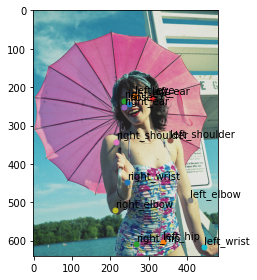

In [181]:
for idx, each_keypoint in enumerate(img_keypoints_v):
    if each_keypoint == 2:
        x_ = img_keypoints_x[idx]
        y_ = img_keypoints_y[idx]
        label = keypoints[idx]
        plt.scatter(x_, y_, s=25)
        plt.text(label, (x_, y_-10))
        plt.imshow(img)
plt.tight_layout()
plt.show()

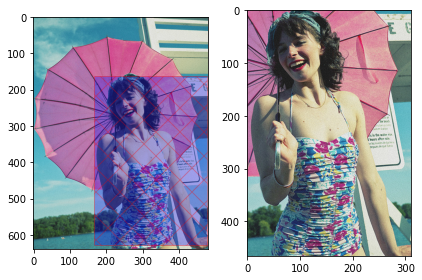

In [153]:
fig, ax = plt.subplots(ncols=2)
x, y, width, height = box
ax[0].imshow(img)
b = patches.Rectangle((x, y),width,height,linewidth=1, edgecolor='r',
                     facecolor='b', alpha=0.3, hatch='x')

ax[0].add_patch(b)
ax[1].imshow(img[int(y):int(y+height),int(x):int(x+width),:])
plt.tight_layout()
plt.show()